# YOLO segmentation and classification task

## Get the data

In [1]:
from datasets import load_dataset

dataset = load_dataset("skyimagenet/SKIPPD")

print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image', 'time', 'pv'],
        num_rows: 349372
    })
    test: Dataset({
        features: ['image', 'time', 'pv'],
        num_rows: 14003
    })
})


## Set up the model

In [2]:
from ultralytics import YOLO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained YOLO model
model_path = "yolo11s-seg.pt"  # Path to the provided YOLO model
model = YOLO(model_path)  # Load the model

## Run inference on SKIPPD images


0: 640x640 (no detections), 1261.6ms
Speed: 14.0ms preprocess, 1261.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


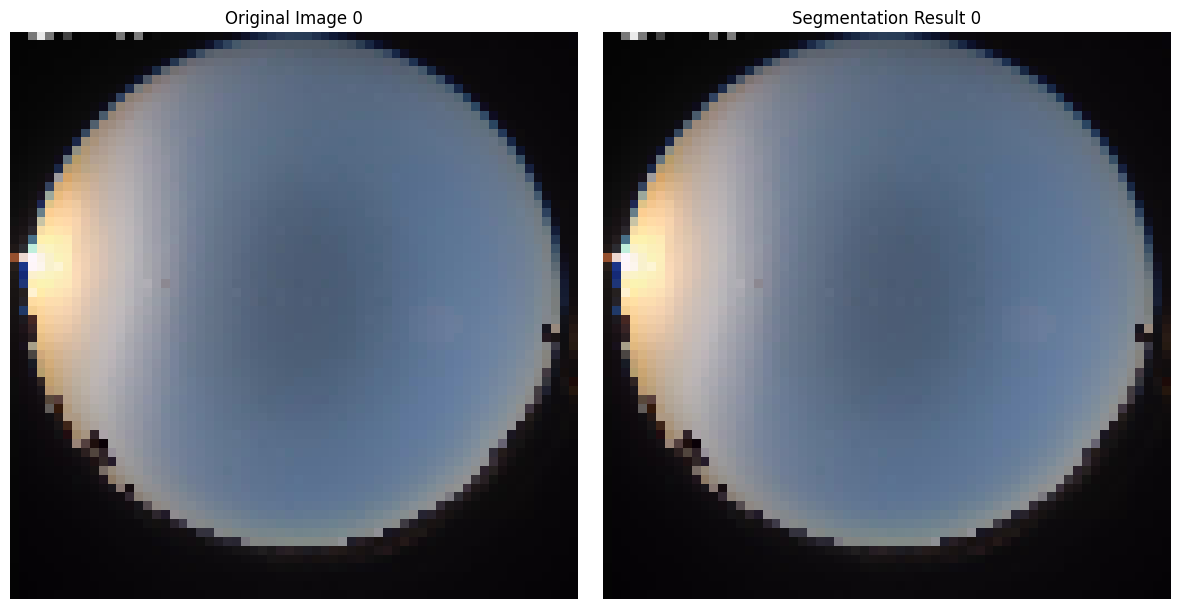


0: 640x640 (no detections), 902.8ms
Speed: 18.1ms preprocess, 902.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


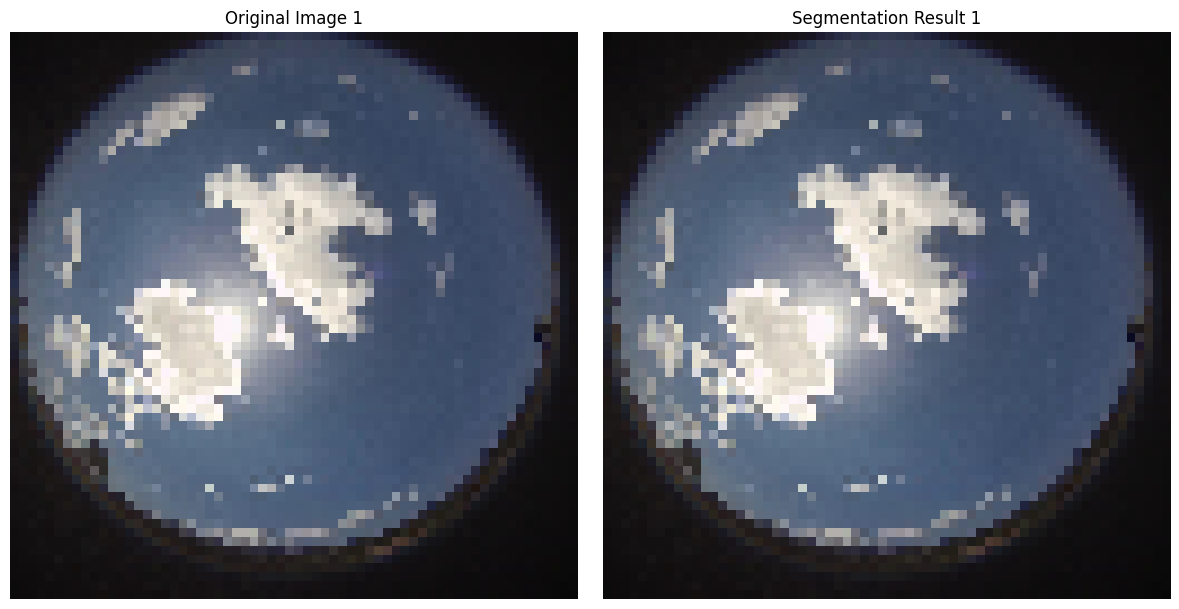


0: 640x640 (no detections), 876.6ms
Speed: 2.5ms preprocess, 876.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


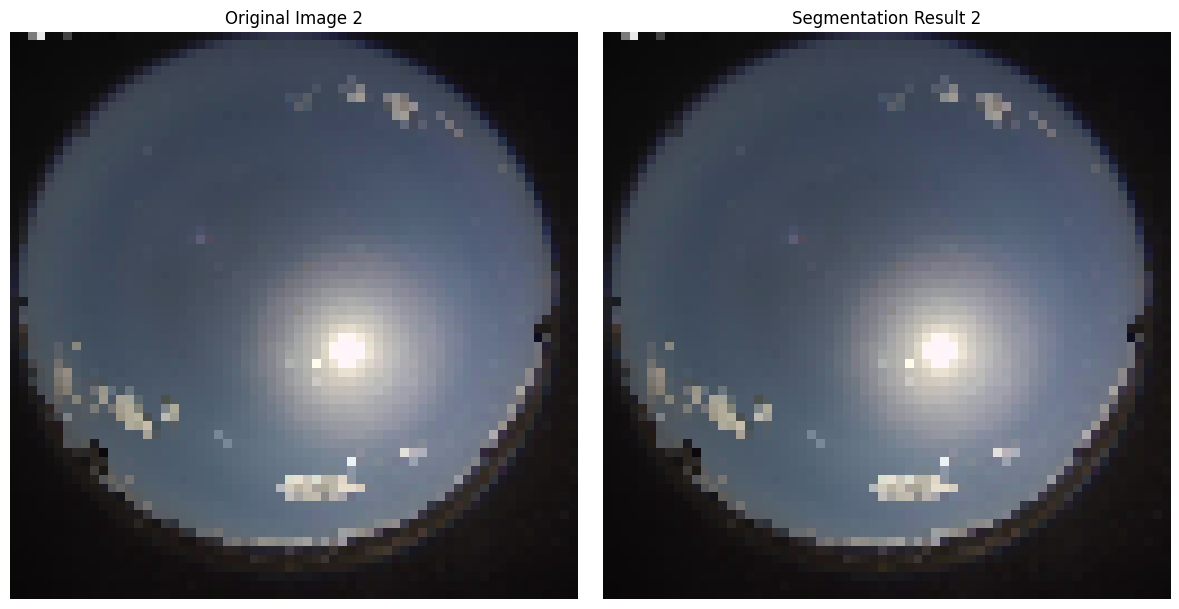


0: 640x640 (no detections), 913.9ms
Speed: 8.5ms preprocess, 913.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


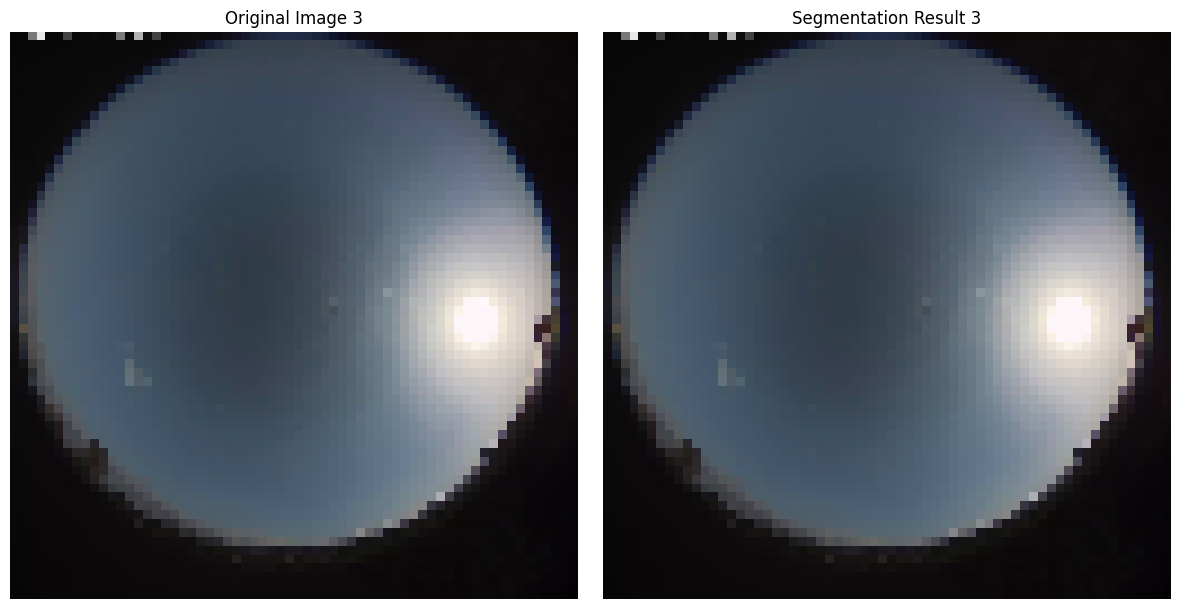


0: 640x640 1 donut, 758.3ms
Speed: 8.1ms preprocess, 758.3ms inference, 23.2ms postprocess per image at shape (1, 3, 640, 640)


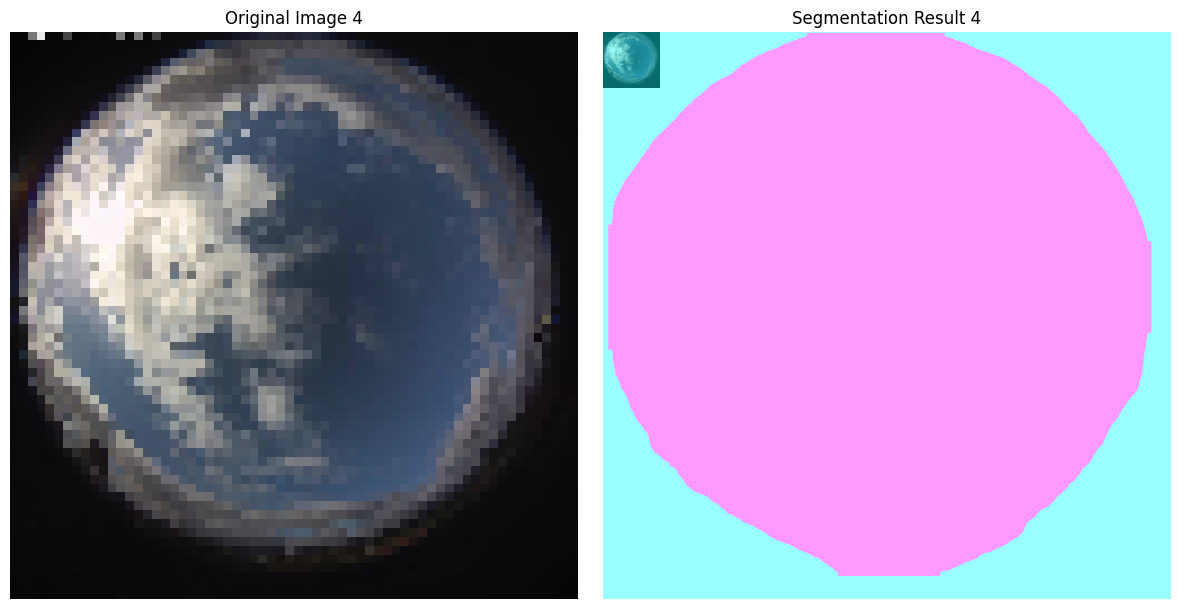

In [3]:
# Convert the first 5 samples to a list of dictionaries
samples = list(dataset["train"].select(range(0,5000,1000)))

# Perform inference
for idx, sample in enumerate(samples):
    image = np.array(sample["image"])  # Convert PIL Image to NumPy array

    # Run inference
    results = model(image)  # Inference on the image

    # Extract segmentation masks
    masks = results[0].masks.data.cpu().numpy() if results[0].masks else None

    # Visualize the results
    plt.figure(figsize=(12, 6))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f"Original Image {idx}")
    plt.axis("off")

    # Segmentation mask overlay
    plt.subplot(1, 2, 2)
    plt.imshow(image)
    if masks is not None:
        for mask in masks:
            plt.imshow(mask, alpha=0.4, cmap="cool")
    plt.title(f"Segmentation Result {idx}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

## Run inference on contrail dataset


0: 640x640 (no detections), 227.7ms
Speed: 4.6ms preprocess, 227.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


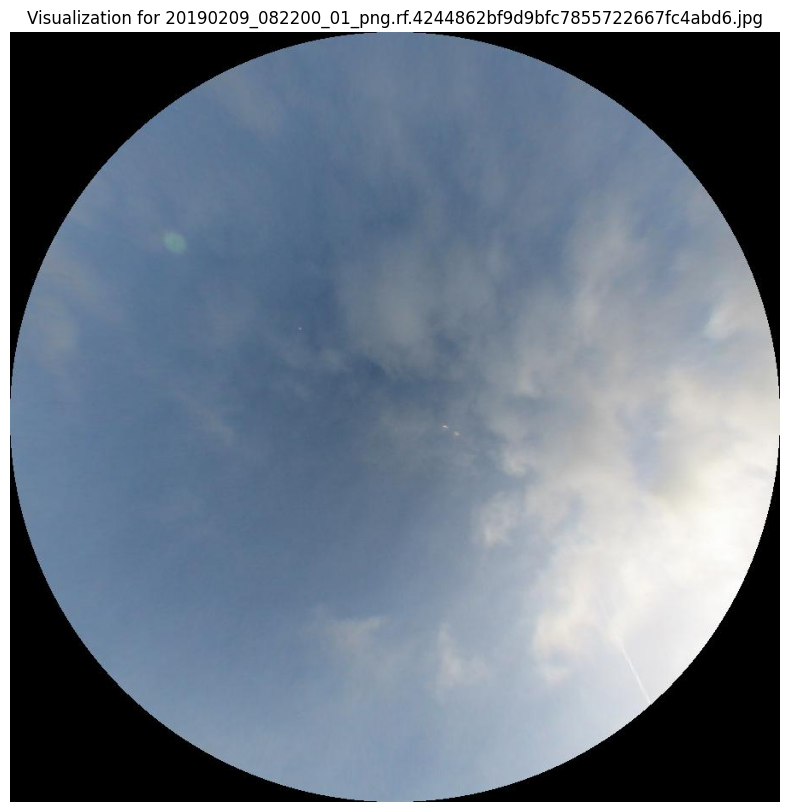


0: 640x640 (no detections), 224.8ms
Speed: 6.9ms preprocess, 224.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


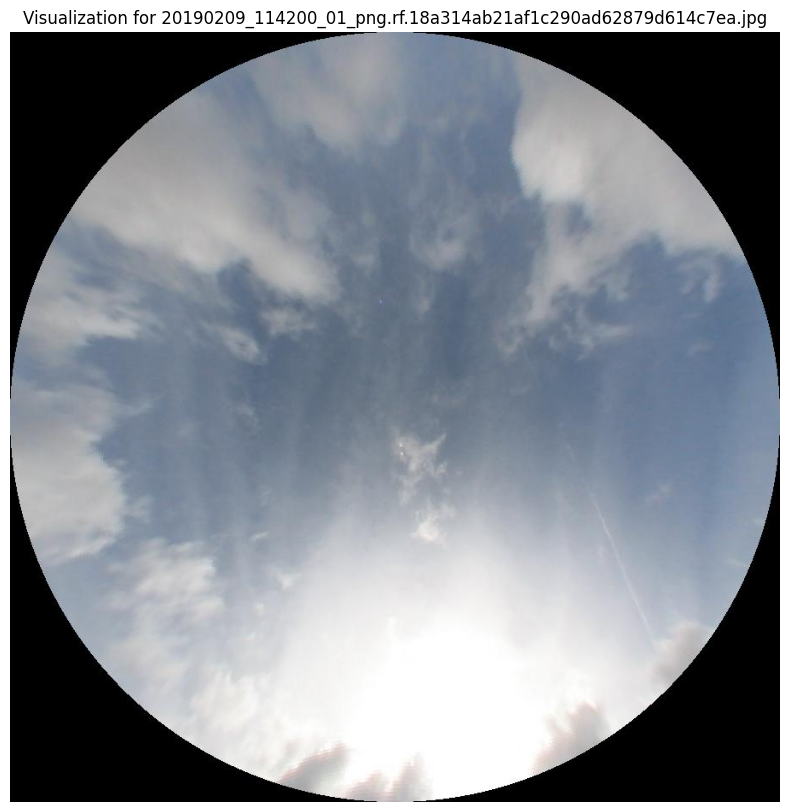


0: 640x640 (no detections), 311.4ms
Speed: 3.0ms preprocess, 311.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


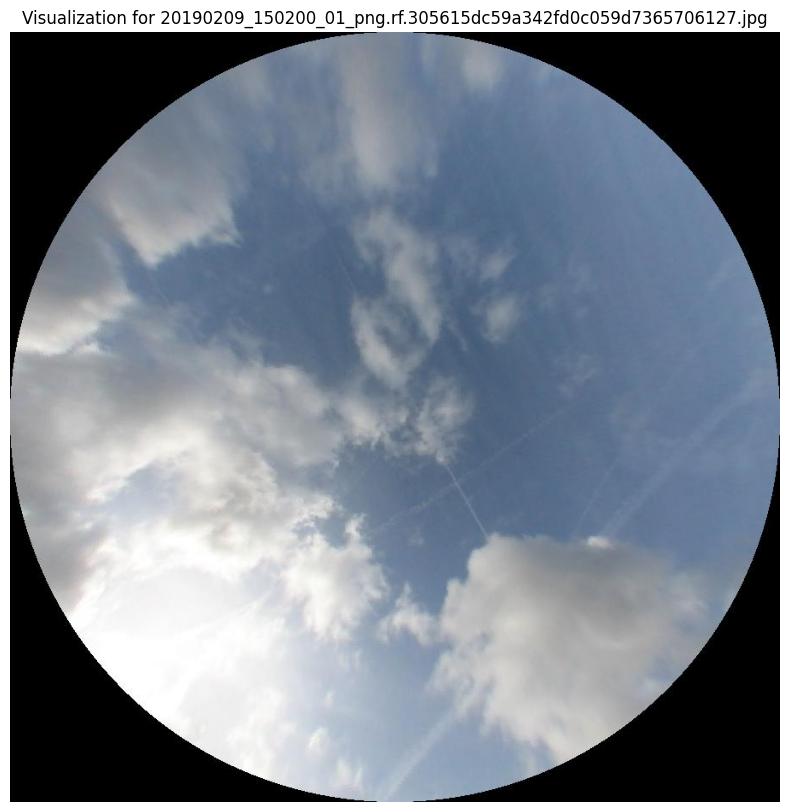


0: 640x640 (no detections), 266.9ms
Speed: 7.1ms preprocess, 266.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


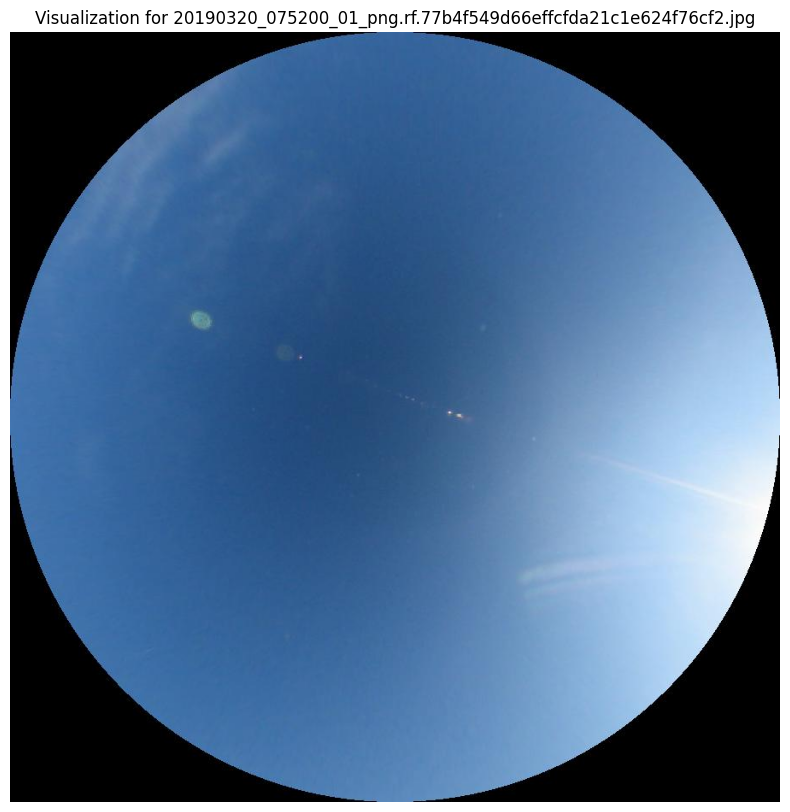


0: 640x640 (no detections), 327.5ms
Speed: 0.0ms preprocess, 327.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


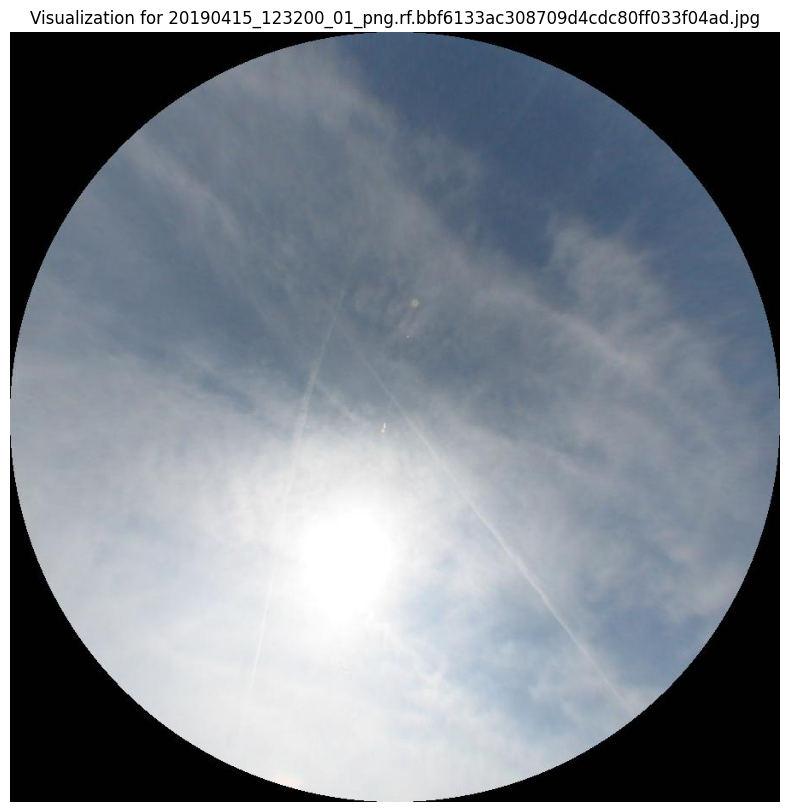

In [8]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt

# Define paths
cwd = os.getcwd()
pardir = os.path.dirname(cwd)
dataset_folder = os.path.join(pardir, "contrail_seg1.v27i.yolov8/train/images")  # Replace 'dataset_name' with your dataset folder name
model_path = "yolo11s-seg.pt"  # Path to the YOLO model

# Load the YOLO model
model = YOLO(model_path)

# List all images in the dataset
image_files = [os.path.join(dataset_folder, img) for img in os.listdir(dataset_folder) if img.endswith((".jpg", ".png"))]

# Function to run inference and visualize results
def run_inference_visualize(model, images):
    for i, image_path in enumerate(images[500:1000:100]):  # Limit the number of images for visualization
        # Load the image
        image = cv2.imread(image_path)

        # Run inference
        results = model(image)

        # Visualize the results
        for result in results:
            plt.figure(figsize=(10, 10))
            annotated_image = result.plot()  # Plot the annotated image
            plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))  # Convert to RGB for matplotlib
            plt.axis("off")
            plt.title(f"Visualization for {os.path.basename(image_path)}")
            plt.show()

# Run inference and visualize results
run_inference_visualize(model, image_files)